In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289AA09EB88>,
      dtype=object)

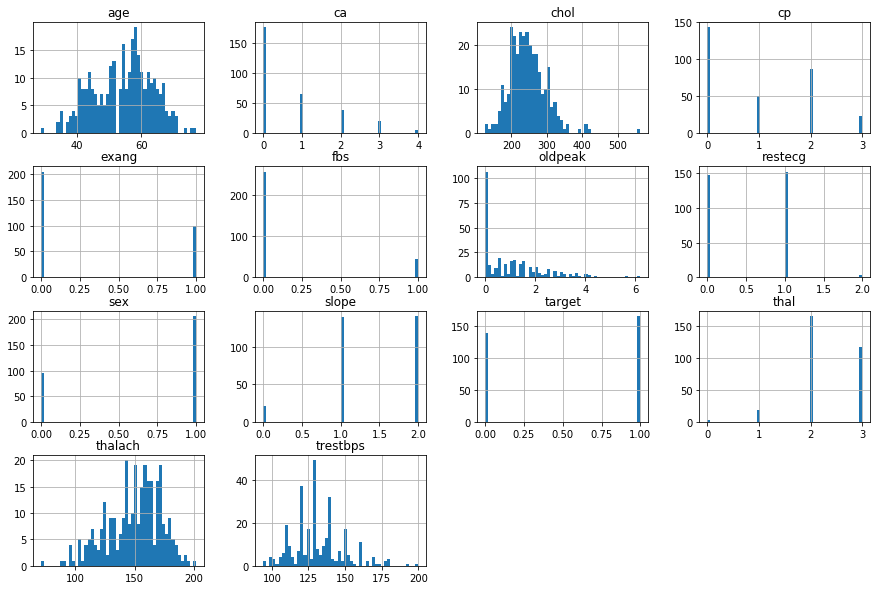

In [7]:
df.hist(bins=50,figsize=(15,10))

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
num=df[['age','chol','oldpeak','thalach','trestbps','target']]
obj=df[['sex','cp','exang','fbs','restecg','ca','slope','thal']]

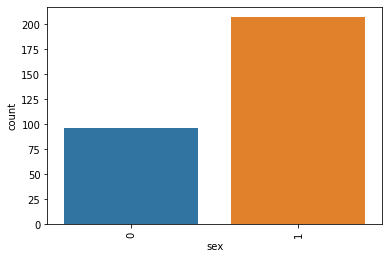

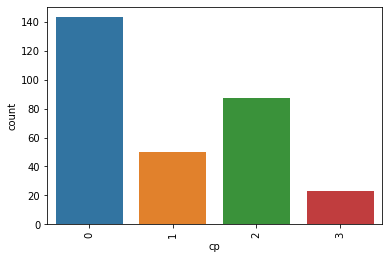

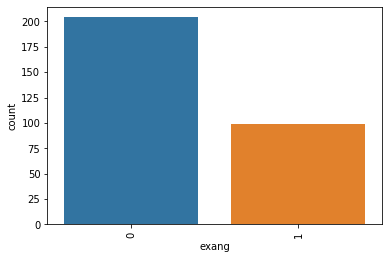

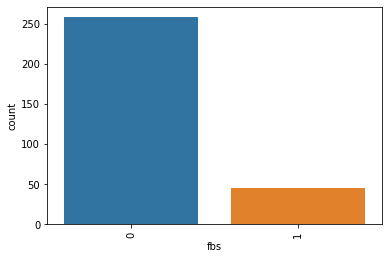

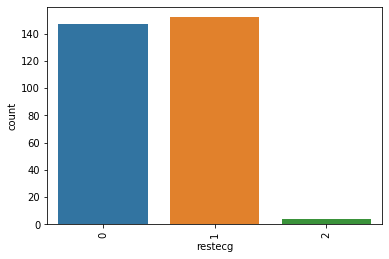

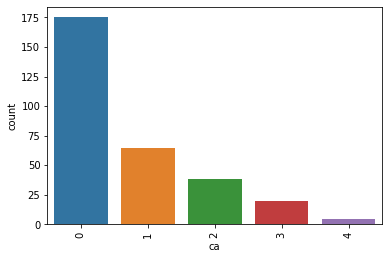

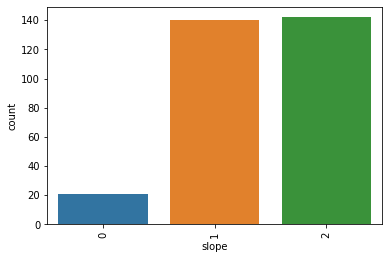

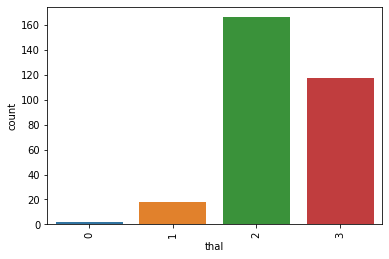

In [10]:
for i in obj:
    plt.figure()
    plt.xticks(rotation='vertical')
    sns.countplot(obj[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289AC69FE88>,
      dtype=object)

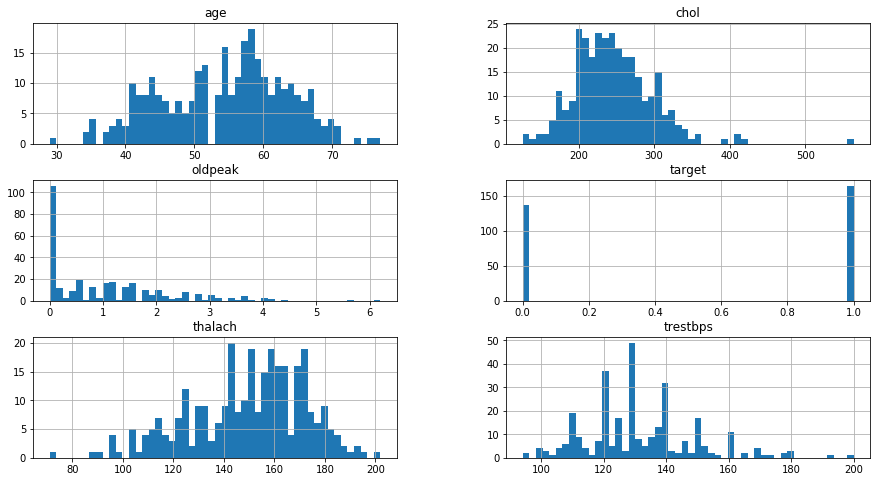

In [11]:
num.hist(bins=50,figsize=(15,8))

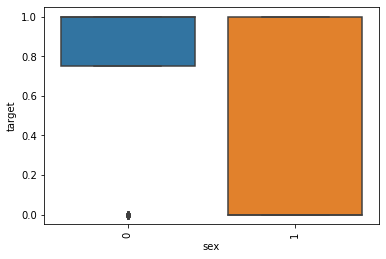

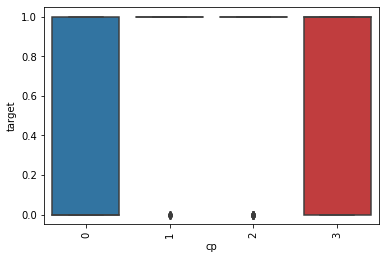

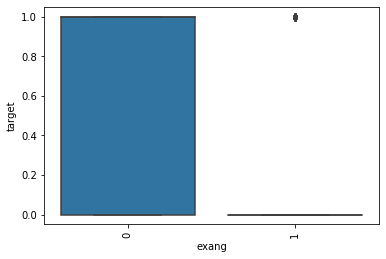

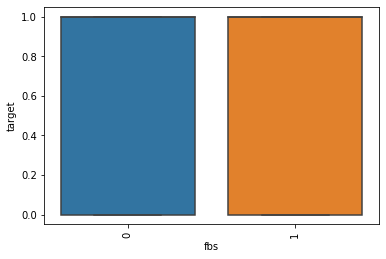

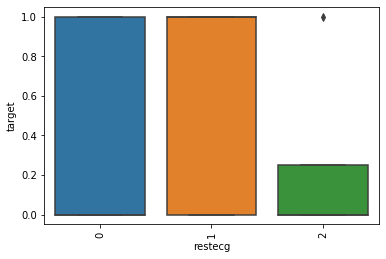

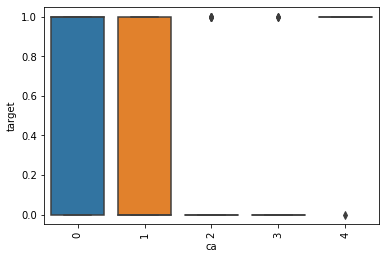

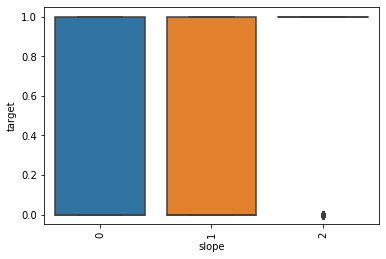

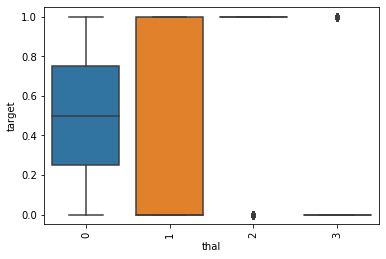

In [17]:
for i in obj:
    plt.figure()
    plt.xticks(rotation='vertical')
    sns.boxplot(x=obj[i],y=num.iloc[:,-1])

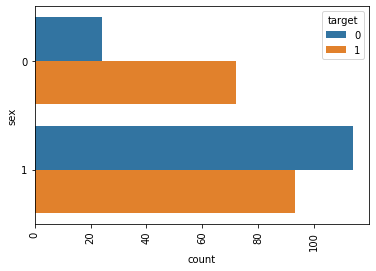

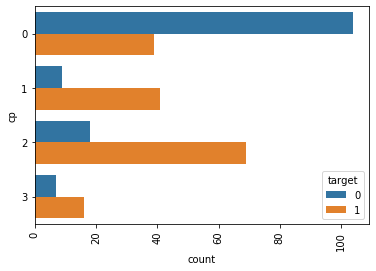

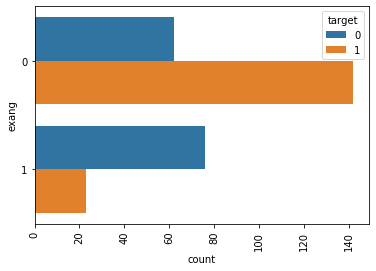

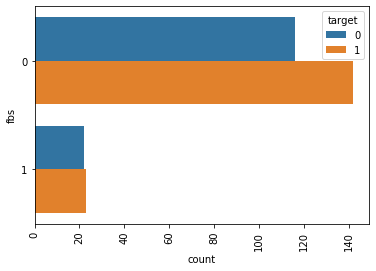

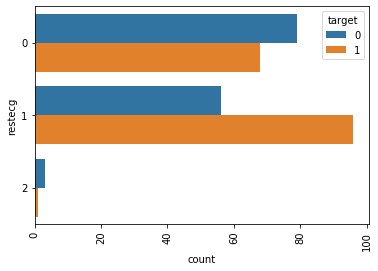

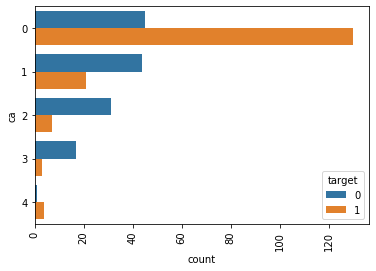

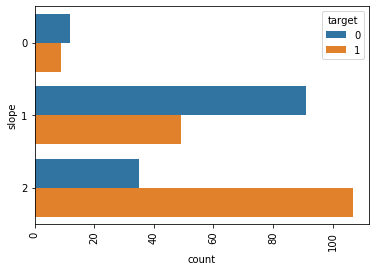

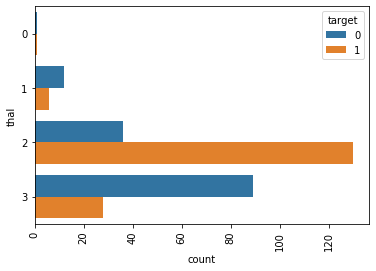

In [20]:
for i in obj:
    plt.figure()
    plt.xticks(rotation='vertical')
    sns.countplot(y=obj[i],hue=num.iloc[:,-1])

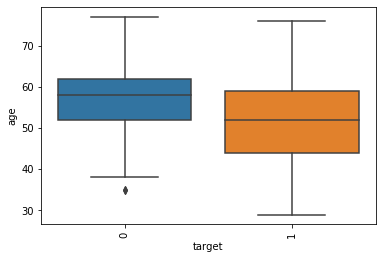

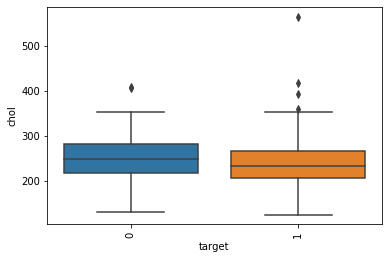

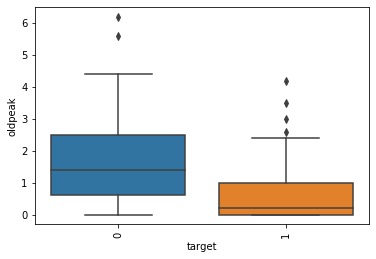

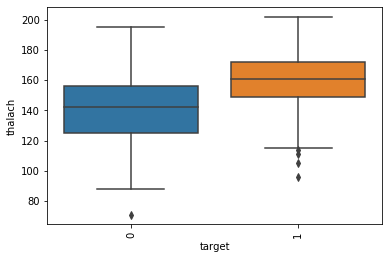

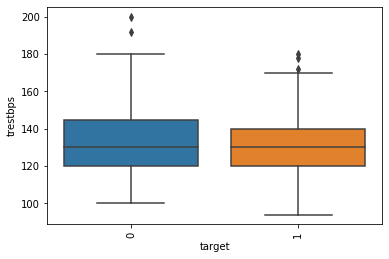

In [22]:
for i in num.iloc[:,:-1]:
    plt.figure()
    plt.xticks(rotation='vertical')
    sns.boxplot(y=num[i],x=num.iloc[:,-1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289AFB0A048>,
      dtype=object)

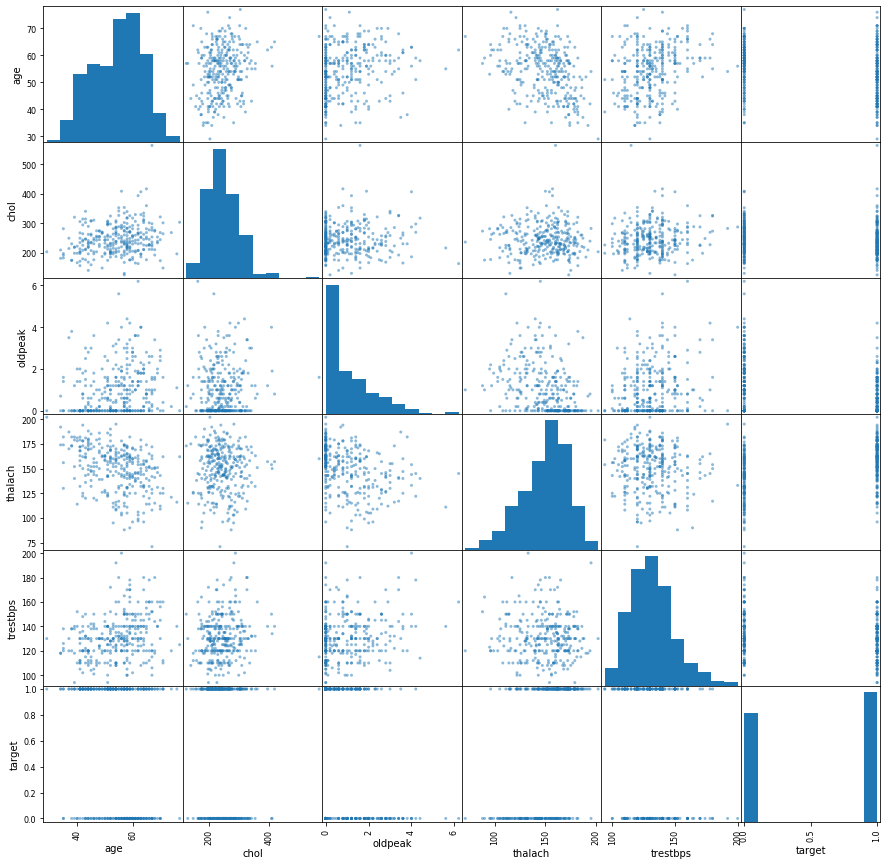

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(num,figsize=(15,15))

In [33]:
from scipy import stats
z=np.abs(stats.zscore(df))
df=df[(z<3).all(axis=1)]

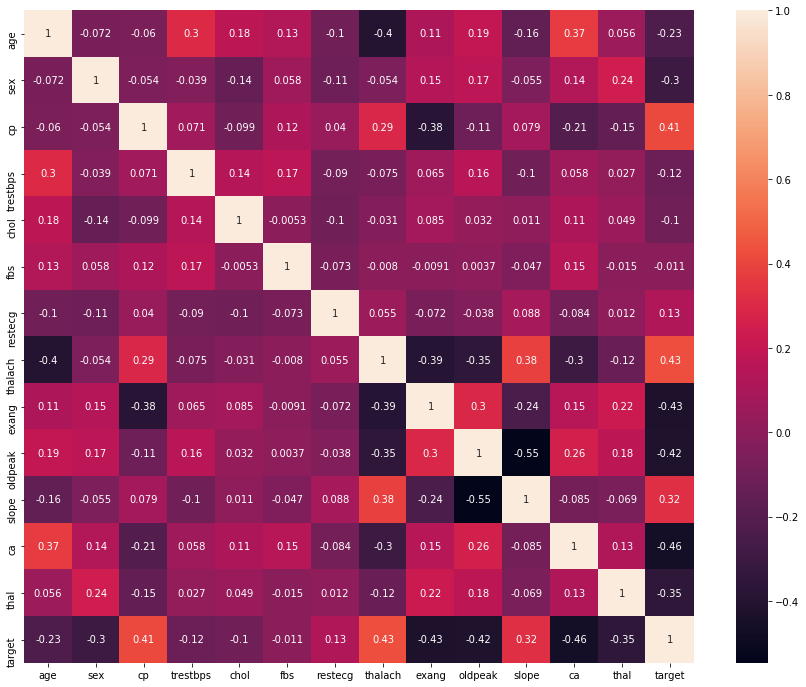

In [39]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [43]:
import statsmodels.api as sm
result=sm.OLS(df.iloc[:,-1],df.iloc[:,:-1]).fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              76.25
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                    5.57e-83
Time:                        20:36:33   Log-Likelihood:                         -102.05
No. Observations:                 287   AIC:                                      230.1
Df Residuals:                     274   BIC:                                      277.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0048      0.002      1.953      0.052   -3.81e-05       0.010
sex           -0.1550      0.048     -3.210      0.001      -0.250      -0.060
cp             0.0969      0.023      4.240      0.000       0.052       0.142
trestbps      -0.0009      0.001     -0.697      0.486      -0.003       0.002
chol       -6.476e-05      0.000     -0.139      0.889      -0.001       0.001
fbs            0.0321      0.062      0.517      0.606      -0.090       0.154
restecg        0.0614      0.040      1.525      0.128      -0.018       0.141
thalach        0.0048      0.001      5.323      0.000       0.003       0.007
exang         -0.1102      0.052     -2.110      0.036      -0.213      -0.007
oldpeak       -0.0480      0.025     -1.934      0.054      -0.097       0.001
slope          0.1023      0.043      2.383      0.018       0.018       0.187
ca            -0.1537      0.026     -5.859      0.000      -0.205      -0.102
thal          -0.1264      0.037     -3.393      0.001      -0.200      -0.053
==============================================================================
Omnibus:                        8.812   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.976
Skew:                          -0.433   Prob(JB):                       0.0112
Kurtosis:                       3.045   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from vif import cal_vif
cal_vif(df.iloc[:,:-1])

,variables,VIF
0,age,42.284434
1,sex,3.697290
2,cp,2.423955
3,trestbps,62.703849
4,chol,30.815664
5,fbs,1.265854
6,restecg,2.086726
7,thalach,43.508741
8,exang,2.051065
9,oldpeak,3.075604


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X):

    '''X - pandas dataframe'''
    thresh = 5.0
    variables = range(X.shape[1])

    for i in np.arange(0, len(variables)):
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]
        print(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]

    print('Remaining variables:')
    print(X.columns[variables])
    return X

In [48]:
df.shape

(287, 14)

In [50]:
from sklearn.feature_selection import SelectKBest,chi2
result=SelectKBest(chi2,k='all').fit(df.iloc[:,:-1],df.iloc[:,-1])

[2.23774900e+01 8.16701035e+00 5.28502196e+01 8.96682507e+00
 2.45779449e+01 3.21852615e-02 2.52126091e+00 1.80781981e+02
 3.55335439e+01 5.98809156e+01 7.84451652e+00 7.96909819e+01
 5.31345281e+00]


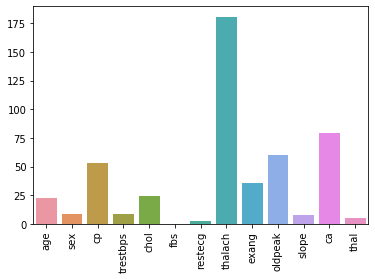

In [53]:
print(result.scores_)
plt.xticks(rotation='vertical')
sns.barplot(np.array(df.columns)[:-1],result.scores_)

In [57]:
w=pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(result.scores_)],axis=1)
w.sort_values(1,ascending=False)

,0,1
7,thalach,180.781981
11,ca,79.690982
9,oldpeak,59.880916
2,cp,52.850220
8,exang,35.533544
4,chol,24.577945
0,age,22.377490
3,trestbps,8.966825
1,sex,8.167010
10,slope,7.844517


In [58]:
df=df[['thalach','ca','oldpeak','cp','exang','target']]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from xgboost import XGBClassifier

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=0,shuffle=True)

In [61]:
lr=LogisticRegression(random_state=0)
rfe=RandomForestClassifier(n_estimators=200,random_state=0)
dtc=DecisionTreeClassifier(random_state=0)
svm=SVR(kernel='linear')
xg=XGBClassifier(n_estimators=200)

In [62]:
select_1=RFECV(lr,step=1,cv=4).fit(X_train,Y_train)
select_2=RFECV(rfe,step=1,cv=4).fit(X_train,Y_train)
select_3=RFECV(dtc,step=1,cv=4).fit(X_train,Y_train)
select_4=RFECV(svm,step=1,cv=4).fit(X_train,Y_train)
select_5=RFECV(xg,step=1,cv=4).fit(X_train,Y_train)

In [67]:
print('logisticregression')
pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(select_1.support_),pd.Series(select_1.ranking_)],axis=1)

logisticregression


,0,1,2
0,thalach,False,2
1,ca,True,1
2,oldpeak,True,1
3,cp,True,1
4,exang,True,1


In [68]:
print('randomforest')
pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(select_2.support_),pd.Series(select_2.ranking_)],axis=1)

randomforest


,0,1,2
0,thalach,True,1
1,ca,True,1
2,oldpeak,True,1
3,cp,True,1
4,exang,False,2


In [69]:
print('decisiontree')
pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(select_3.support_),pd.Series(select_3.ranking_)],axis=1)

decisiontree


,0,1,2
0,thalach,True,1
1,ca,True,1
2,oldpeak,True,1
3,cp,True,1
4,exang,True,1


In [70]:
print('SVM')
pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(select_4.support_),pd.Series(select_4.ranking_)],axis=1)

SVM


,0,1,2
0,thalach,True,1
1,ca,True,1
2,oldpeak,True,1
3,cp,True,1
4,exang,True,1


In [71]:
print('xgboost')
pd.concat([pd.Series(np.array(df.columns)[:-1]),pd.Series(select_5.support_),pd.Series(select_5.ranking_)],axis=1)

xgboost


,0,1,2
0,thalach,False,5
1,ca,False,2
2,oldpeak,False,4
3,cp,True,1
4,exang,False,3


In [72]:
svm=svm.fit(X_train,Y_train)
svm.score(X_train,Y_train)

0.3804369330538588

In [76]:
dtc=dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)

1.0

In [75]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf').fit(X_train,Y_train)
svm.score(X_train,Y_train)

0.6637554585152838

In [77]:
y_predict=dtc.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,Y_test)

0.7586206896551724

In [82]:
rfe=rfe.fit(X_train.iloc[:,:-1],Y_train)
rfe.score(X_train.iloc[:,:-1],Y_train)

1.0

In [83]:
y_predict=rfe.predict(X_test.iloc[:,:-1])
accuracy_score(y_predict,Y_test)

0.8103448275862069